# APE Práctica N°2 - Análisis Exploratorio de Datos
### FACULTAD DE LA ENERGÍA, LAS INDUSTRIAS Y LOS RECURSOS NATURALES NO RENOVABLES
### CARRERA DE INGENIERÍA EN COMPUTACIÓN
### PERIODO MARZO - AGOSTO 2025
**Apellido_Nombre_APE**

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga del dataset
data = pd.read_csv('countries.csv')
data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [3]:
# Normalización del dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = data.select_dtypes(include=[np.number]).columns
data_normalized = data.copy()
data_normalized[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data_normalized.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,0.000027,Andorra la Vella,EU,EUR,Euro,NaN,AN,0.353857,ca,Andorra,"ES,FR",0.022371,376,0.000063,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,0.004847,Abu Dhabi,AS,AED,Dirham,NaN,AE,0.028507,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",0.876957,971,0.003741,NaN,NaN,.ae
2,AF,AFG,0.037865,Kabul,AS,AFN,Afghani,NaN,AF,0.130074,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",0.004474,93,0.021895,NaN,NaN,.af
3,AG,ATG,0.000026,St. John's,NaN,XCD,Dollar,NaN,AC,0.417110,en-AG,Antigua and Barbuda,NaN,0.031320,+1-268,0.000065,NaN,NaN,.ag
4,AI,AIA,0.000006,The Valley,NaN,XCD,Dollar,NaN,AV,0.416769,en-AI,Anguilla,NaN,0.738255,+1-264,0.000010,NaN,NaN,.ai


In [4]:
# Cálculo de datos estadísticos
statistics = data.describe()
statistics

# Media
media = data.mean(numeric_only=True)
# Desviación estándar
std_dev = data.std(numeric_only=True)
# Valores máximos
max_values = data.max(numeric_only=True)
# Valores mínimos
min_values = data.min(numeric_only=True)

print('Media:\n', media)
print('\nDesviación Estándar:\n', std_dev)
print('\nValores Máximos:\n', max_values)
print('\nValores Mínimos:\n', min_values)

Media:
 area          5.952879e+05
geoname_id    2.427870e+06
numeric       4.343095e+02
population    2.727679e+07
dtype: float64

Desviación Estándar:
 area          1.904818e+06
geoname_id    1.632093e+06
numeric       2.546631e+02
population    1.164127e+08
dtype: float64

Valores Máximos:
 area          1.710000e+07
geoname_id    8.505033e+06
numeric       8.940000e+02
population    1.330044e+09
dtype: float64

Valores Mínimos:
 area              0.0
geoname_id    49518.0
numeric           0.0
population        0.0
dtype: float64


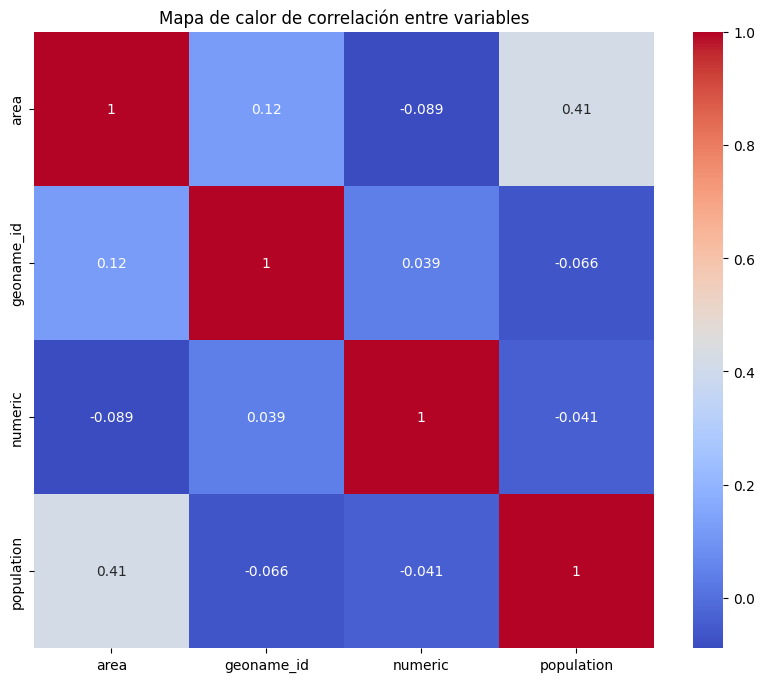

In [5]:
# Correlación entre variables
correlation = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre variables')
plt.show()

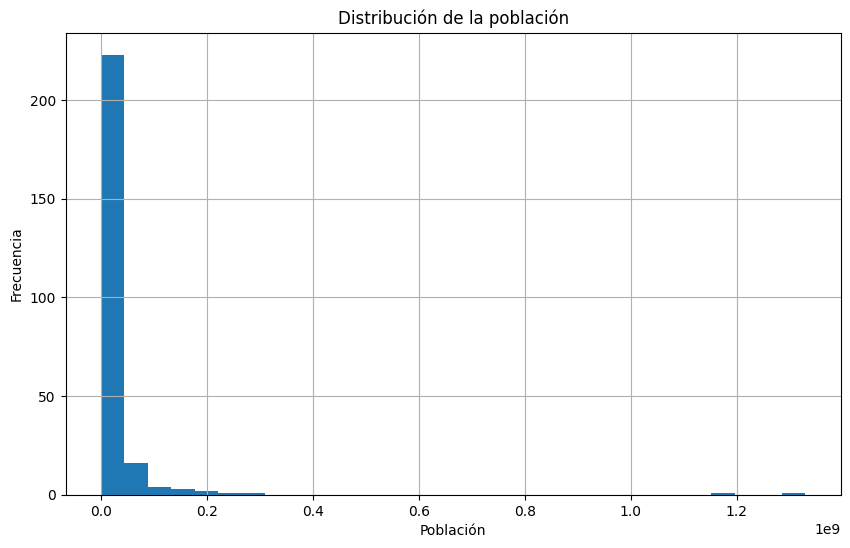

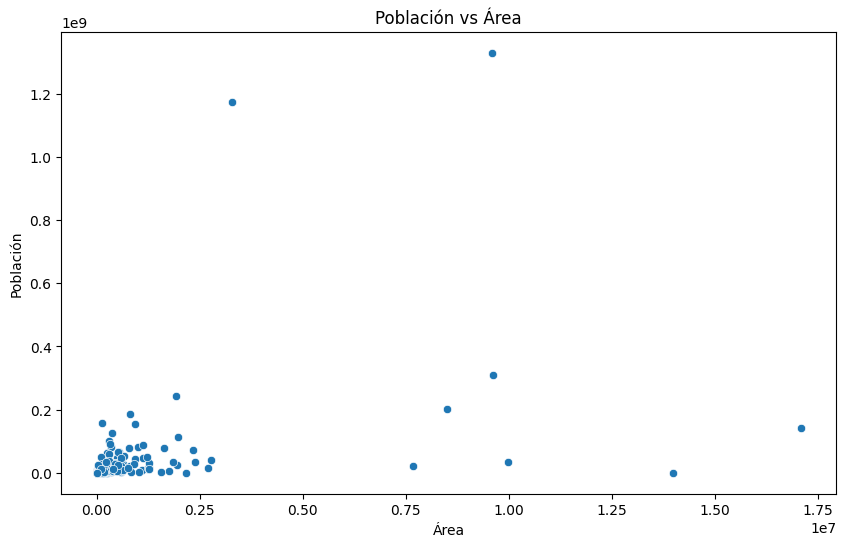

In [7]:
# Gráficas estadísticas
# Histograma
data['population'].hist(bins=30, figsize=(10,6))
plt.title('Distribución de la población')
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.show()

# Dispersión Population vs Area
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='population', data=data)
plt.title('Población vs Área')
plt.xlabel('Área')
plt.ylabel('Población')
plt.show()

## Preguntas de control
1. **Descripción del dataset**: Contiene datos de países como población, área y variables demográficas.
2. **¿Por qué normalizar?**: Para que todas las variables estén en la misma escala.
3. **Análisis de resultados**: Permite detectar patrones, outliers y relaciones entre variables.

## Conclusiones
- El análisis exploratorio ayuda a comprender mejor el dataset.
- Normalizar los datos es crucial para análisis comparativos.
- Las visualizaciones permiten identificar correlaciones y patrones de comportamiento.